# P2I7 - Le pendule double

**Projet mené par :** Lomenech Nathan, Gagou Mattéo, Roche Nathan, Mauclaire Alexis

<img src="pendule_double.gif" alt="Texte alternatif" style="width:400px;height:400px;">

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

## Table des matières : 

<u>1. Présentation du système</u>

    1. Schema et nomenclature
    2. Contexte linéaire et non linéaire
    4. Solution analytique au contexte linéaire
    5. Energie totale du système

<u>2. Méthodes de résolutions utilisées : </u>
    
    1. Newmark
    2. Solve ivp
    
<u>3. Résolution au contexte linéaire : </u>

    1. Comparaison des résultats
    
<u>4. Résolution au contexte non linéaire : </u>

    1. Comparaison des résultats
    
<u>5. Comparaison linéaire / non linéaire :</u>

    1. Détermination de l'angle critique
    
<u>6. Exploitation des modèles : </u>

    1. Portrait de phase aux grands angles
    2. Section de Poincarré
    3. Diagramme de biffurcation
    4. Exposant de Lyapunov

# 1. Présentation du système

## 1.1 Schéma et nomenclature

#### On utilise le schéma suivant pour la nomenclature des angles et longeurs :
<img src="schema.png" alt="Texte alternatif" style="width:300px;height:300px;">

#### Les différentes variables aux petits angles: 
 - solution_ana_pa : **solution analytique aux petits angles**, array 2D avec [$\theta_1$,$\theta_2$, $\dot{\theta_1}$,$\dot{\theta_1}$]
 - solution_ivp_pa : **solution obtenu avec solve.ivp** array 2D avec [$\theta_1$, $\theta_2$,$\dot\theta_1$,$\dot{\theta_2}$]
 - solution_newmark_pa :  **solution obtenu avec l'algorithme de Newmark** array 2D avec [$\theta_1$,$\theta_2$, $\dot{\theta_1}$,$\dot{\theta_1}$]
 - x0 = [$\theta_{10}$,$\theta_{20}$,$\dot\theta_{10}$, $\dot\theta_{20}$]

#### Les différentes variables aux grands angles: 
 - solution_ivp_ga : **solution obtenu avec solve.ivp** array 2D avec [$\theta_1$, $\dot{\theta_1}$,$\theta_2$,$\dot{\theta_1}$]
 - solution_newmark_ga :  **solution obtenu avec l'algorithme de Newmark** array 2D avec [$\theta_1$,$\theta_2$, $\dot{\theta_1}$,$\dot{\theta_1}$]
- x0 = [$\theta_{10}$,$\theta_{20}$,$\dot\theta_{10}$, $\dot\theta_{20}$]


 **Nomenclature des fonctions/variables** :
 - _pa = petits angles -> contexte non linéaire
 - _ga = grands angles -> contexte linéaire


## 1.2 Contexte linéaire

#### Equations différentielles dans le contexte non linéaire:

Avec une approche Newtonienne, on obtient :

$\hspace{3cm} 
\begin{cases} 
(m_1 + m_2)l_1\ddot\theta_1 + m_2 l_2 \cos(\theta_1 - \theta_2)\ddot\theta_2 + m_2 l_2 \sin(\theta_1 - \theta_2)\theta_2^2 + (m_1 + m_2)g \sin\theta_1 = 0
\\ 
m_2 l_2 \ddot\theta_2 + m_2 l_1 \cos(\theta_1 - \theta_2)\ddot\theta_1 - m_2 l_1 \sin(\theta_1 - \theta_2)\theta_1^2 + m_2 g \sin\theta_2 = 0
\end{cases}$

## 1.3 Linéarisation aux petits angles

#### Système d'équations différentielles dans un contexte linéaire : 

$\hspace{3cm} 
\begin{cases} 
l_1 \ddot{\theta_1} + (1 + \mu)g \theta_1 -\mu g \theta_2 = 0
\\ 
l_2 \ddot{\theta_2} - (1+\mu)g \theta_1 + (1+\mu)g \theta_2 = 0
\end{cases}$

avec $\mu = \frac{m_2}{m_1}$

## 1.4 Solution analytique aux petits angles

On a le système suivant :

$\hspace{3cm} 
\begin{cases} 
(m_1 + m_2)l_1^2 \ddot{\theta}_1 + m_2l_1l_2\ddot{\theta}_2 + (m_1 + m_2)gl_1\theta_1 = 0
\\ 
m_2l_1l_2\ddot{\theta}_2 + m_2l_2^2\ddot{\theta}_2 + m_2gl_2\theta_2 = 0
\end{cases}$


Nous allons utilisé la version suivante : 

$\hspace{3cm} 
\begin{cases} 
\ddot{\theta}_1 = \frac{\mu g\theta_2 - (1+\mu)g\theta_1}{l_1}
\\ 
\ddot{\theta}_2 = \frac{(1+\mu)g \theta_1 - (1+\mu)g\theta_2}{l_2}
\end{cases}$

Avec la solution analytique exacte : 

$\hspace{3cm} 
\begin{cases} 
\theta_1^{exact}(t) = C_1 \cos(\omega_1t + \phi_1) + C_2 \cos(\omega_2t + \phi_2)
\\
\theta_2^{exact}(t) = C_1 A_1 \cos(\omega_1t + \phi_1)+C_2 A_2 \cos(\omega_2 t + \phi_2)
\end{cases}$

avec : 

$$ \omega_{1,2}^2 = \frac{g(1+ \mu)(l_1+l_2) \pm g\sqrt{(1+\mu)^2(l_1+l_2)^2 - 4(1+\mu)l_1l_2}}{2l_1l_2} $$


## 1.5 Energie totale du système 

$\hspace{3cm} 
\begin{cases} 
E_{c1} = -m_1 g l_1 \cos\theta_1
\\ 
E_{c2} = \frac{1}{2}m_2(l_1^2\dot\theta_1^2 +l_2^2 \dot\theta_2^2 + 2l_1 l_2 \cos(\theta_1 - \theta_2)\dot\theta_1 \dot\theta_2 )
\\
E_{p1} = -m_1 g l_1 \cos\theta_1
\\
E_{p2} = -m_2 g (l_1 \cos\theta_1 + l_2\cos\theta_2)
\\
E_{tot} = E_{c1} + E_{c2} + E_{p1} + E_{p2}
\end{cases}$

# 2. Méthodes de résolutions utilisées : 

## 2.1 Newmark

#### Introduction : 


#### Nomenclature : 
- X = arrray numpy 2D des positions angulaires en fonction du temps : X = [$\theta_1$,$\theta_2$]
- Xp = array numpy 2D des vitesses angulaires en fonction du temps : Xp =[$\dot\theta_1$,$\dot\theta_2$]
- Xp = array numpy 2D des accelerations angulaires en fonction du temps : Xpp =[$\ddot\theta_1$,$\ddot\theta_2$]
- precNR : précision de résolution du système d'équations différentielles à chaque pas de temps
- Pour les **Jacobiennes** :
    - Jx : matrice des dérivées partielles en fonction de $\theta_1$,$\theta_2$. Donc en fonction des positions angulaires
    - Jxp : matrice des dérivées partielles en fonction de $\dot\theta_1$,$\dot\theta_2$. Donc en fonction des vitesses angulaires
    - Jxpp = C : matrice des dérivées partielles en fonction de $\ddot\theta_1$,$\ddot\theta_2$. Donc en fonction des accélérations angulaires

#### Initialisation des variables en fonction des CI :
Avant de rentrer dans la boucle, on initialise les variables de position et d'acceleration dans les arrays X et Xp en fonction des conditions initiales renseignées dans l'appel de la fonction.

#### Résolution de l'acceleration à t=0 : 
Afin de pouvoir continuer la résolution du modéle, il faut d'abord caractériser totalement le système à t=0. Il faut donc calculer le vecteur accélération Xpp à t=0 (Xpp[:,0]). Pour cela, on initialise les deux matrices A et B qui correspondent à ....

#### Boucle temporelle :
##### Prédiction des positions/vitesses/accélérations angulaires :
On essaye de prévoir les positions/vitesses/accélérations angulaires au pas de temps t+1 pour avoir une base de départ pour affiner ces valeurs par la suite : 

$\hspace{3cm} 
\begin{cases} 
X_{t+1} = X_t + Xp_t dt + \frac{1}{2}Xpp_t dt^2
\\ 
Xp_{t+1} = Xp_t + Xpp_t dt
\\
Xpp_{t+1} = Xpp_t
\end{cases}$

##### Calcul du résidu de la prédiction :
Afin d'estimer l'erreur faite dans la première prédiction, on calcule le résidu associé aux valeurs prédites. Pour cela, on réinjecte ces valeurs dans le système d'équations différentielles (qui est censé valoir 0 à t+1) et on calcule le résidu associé.

##### Boucle afin de satisfaire la condition sur le résidu : <p>

<div style="text-align: justify">On va essayer d'affiner la prédiction pour satisfaire la condition de précision définie plus tôt (precNR). On oublie pas de mettre en place un garde fou afin de ne pas itérer à l'infini. 
Pour affiner la prédiction, on va itérer plusieurs fois la méthode de Newton-Raphson adaptée aux équations différentiels dont le résultat ajouté aux valeurs précédentes sera pondéré par le résidu précédent.</div><p>

<div style="text-align: justify">Afin d'apater la méthode de Newton-Raphon aux équations différentielles, on calcule des jacobiennes Jx, Jxp, Jxpp (voir nomenclature) que l'on va ensuite combiner en les pondérants en fonction de dt afin d'obtenir une jacobienne du système différentiel. On met ensuite à jour les valeurs de positions/vitesses/accélérations angulaires et on recalcule le résidu avec ces dernières.<p>

Ce programme va donc boucler pour chaque pas de temps jusqu'à satisfaire la condition de précision precNR.

#  3. Résolution au contexte linéaire

## 3.1 Comparaison des résultats

# 4. Résolution au contexte non linéaire

## 4.1 Comparaison des résultats

# 5. Comparaison linéaire / non linéaire

## 5.1 Détermination de l'angle critique

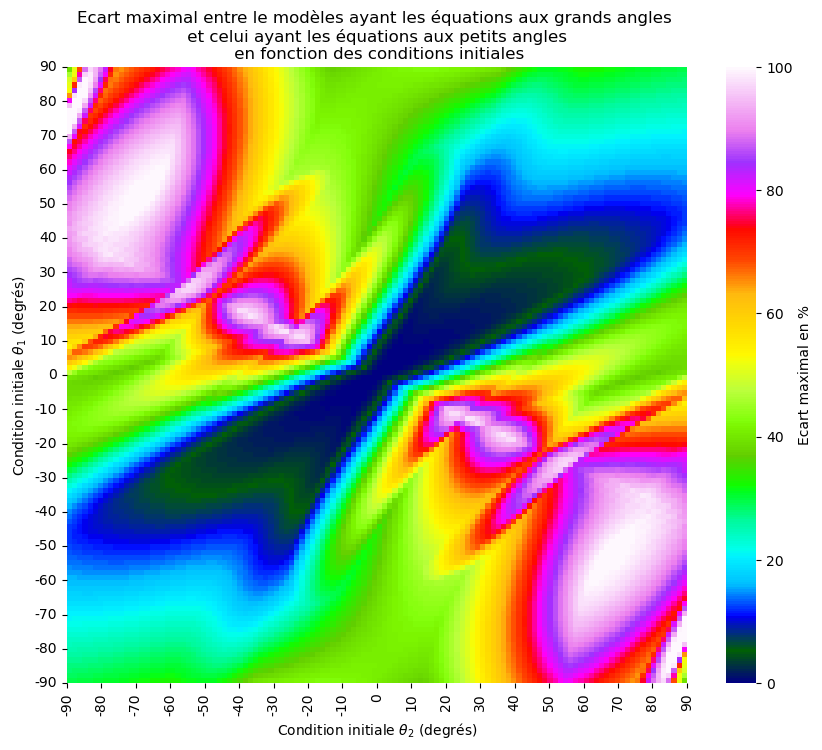

In [6]:
# Chargement des données depuis le fichier CSV
fichier = "data/heatmap_ecart_max_newmark_paga.csv"
heatmap = np.loadtxt(fichier, delimiter=",")

plt.figure(figsize=(10, 8))
ax = sns.heatmap(abs(heatmap), cmap='gist_ncar', cbar_kws={'label': 'Ecart maximal en %'})

# Configuration des ticks majeurs avec espacement de 10 degrés
ax.xaxis.set_major_locator(MultipleLocator(10))  # Ticks tous les 10° sur l'axe x
ax.yaxis.set_major_locator(MultipleLocator(10))  # Ticks tous les 10° sur l'axe y

# Définir les labels pour les ticks
x_labels = np.arange(-90, 91, 10)  # Labels pour l'axe x de -90 à 90 tous les 10°
y_labels = np.arange(-90, 91, 10)  # Labels pour l'axe y de -90 à 90 tous les 10°

# Ajustement des labels des ticks
ax.set_xticks(np.linspace(0, heatmap.shape[1], len(x_labels)))  # Positions des ticks sur l'axe x
ax.set_xticklabels(x_labels)
ax.set_yticks(np.linspace(0, heatmap.shape[0], len(y_labels)))  # Positions des ticks sur l'axe y
ax.set_yticklabels(y_labels[::-1])  # Inversion des labels pour l'axe y

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Ajout des labels pour les axes
ax.set_xlabel('Condition initiale $\\theta_2$ (degrés)')
ax.set_ylabel('Condition initiale $\\theta_1$ (degrés)')
ax.set_title('Ecart maximal entre le modèles ayant les équations aux grands angles \n et celui ayant les équations aux petits angles \n en fonction des conditions initiales')

# Affichage du graphique
plt.show()


# 6. Exploitation des modèles

## 6.1 Portraits de phase

Angles initiaux faibles:



Angles initiaux importants: 



#### Analyse des résultats

## 6.2 Section de Poincaré

Angles initiaux faibles:



Angles initiaux importants:


#### Analyse des résultats

## 6.3 Diagramme de bifurcation

Pour $\theta_1$ : 

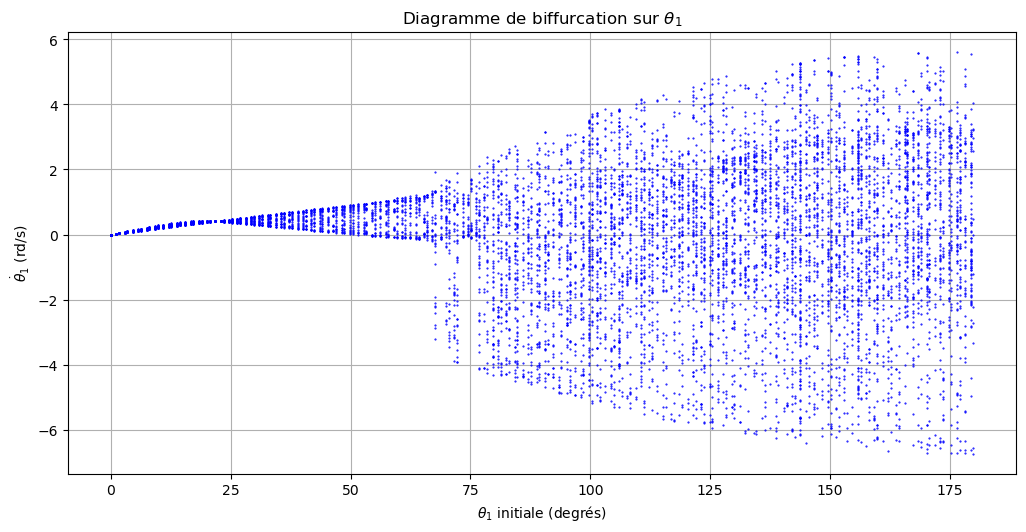

In [10]:
definition = 200
max_len = 150

fichier = "data/biffurcation_theta1.csv"
result_2d = np.loadtxt(fichier, delimiter=',')

final = np.zeros((definition, 2, max_len))

# Rétablissement des dimensions du tableau 3D
result_3d = result_2d.reshape(final.shape)

fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(2, 2, 1)
ax.set_xlabel(r'$\theta_1$ initiale (degrés)')  # Correction de l'unité en degrés
ax.set_ylabel(r'$\dot\theta_1$ (rd/s)')
ax.set_title(r'Diagramme de biffurcation sur $\theta_1$')
ax.grid(True, which='both')

for section in result_3d:
    amp = np.degrees(section[0])
    theta1 = section[1]
    ax.plot(amp, theta1, 'b.', ms=1)
    fig.tight_layout()
    fig.canvas.draw()

plt.show()


Pour $\theta_2$ : 

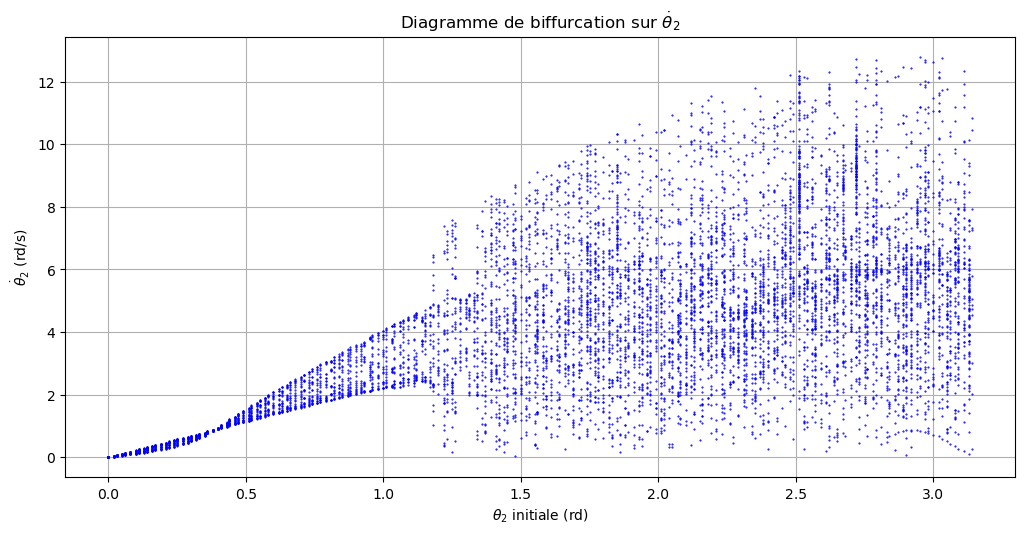

In [11]:
definition = 200
max_len = 150

fichier = "data/biffurcation_theta2.csv"
result_2d = np.loadtxt(fichier, delimiter=',')

final = np.zeros((definition, 2,max_len))

# Rétablissement des dimensions du tableau 3D
result_3d = result_2d.reshape(final.shape)

fig = plt.figure(figsize=(20, 10));

ax = fig.add_subplot(2,2,1);
ax.set_xlabel(r'$\theta_2$ initiale (rd)')
ax.set_ylabel(r'$ \dot\theta_2 $ (rd/s)')
ax.set_title(r'Diagramme de biffurcation sur $ \dot\theta_2$')
ax.grid(True, which='both')


for section in result_3d : 
    amp = section[0]
    theta1 = section[1]
    ax.plot(amp,theta1,'b.', ms=1)
    fig.tight_layout()
    fig.canvas.draw()

#### Analyse des résultats

## 6.4 Exposant de Lyapunov

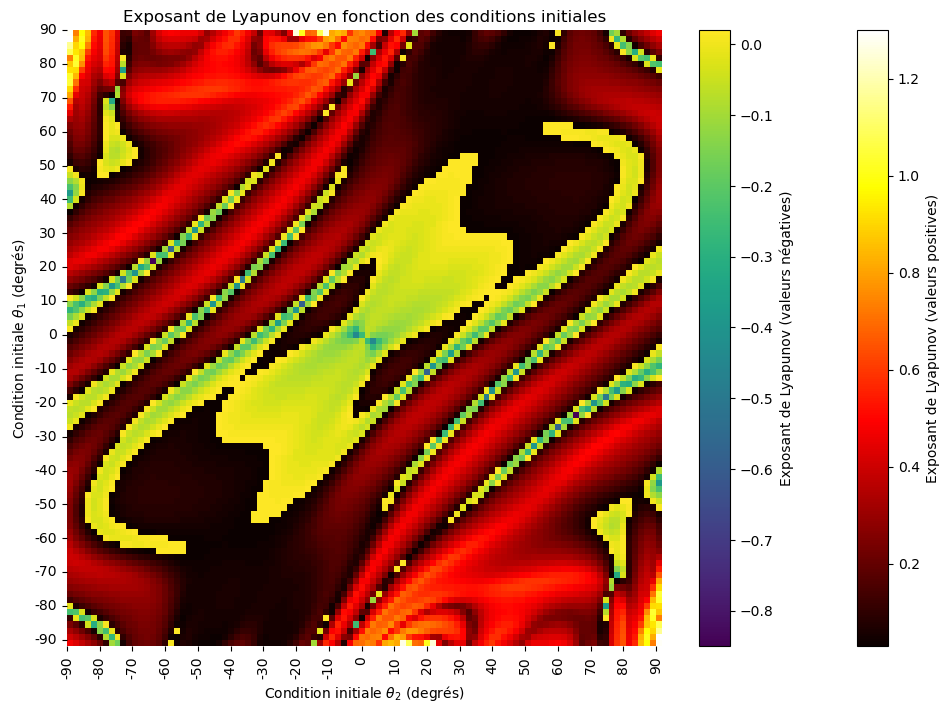

In [8]:
# Chargement des données depuis le fichier CSV
heatmap = np.loadtxt("data/lyapunov.csv", delimiter=",")

# Création de deux masques pour les valeurs positives et négatives
positive_mask = heatmap > 0.02
negative_mask = heatmap <= 0.02

# Configuration des ticks majeurs avec espacement de 10 degrés
x_labels = np.arange(-90, 91, 10)  # Labels pour l'axe x de -90 à 90 tous les 10°
y_labels = np.arange(-90, 91, 10)  # Labels pour l'axe y de -90 à 90 tous les 10°

# Création de la heatmap avec deux colormaps différentes pour les valeurs positives et négatives
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap, cmap='hot', mask=negative_mask, cbar = False)

# Ajout de la deuxième colormap pour les valeurs positives
sns.heatmap(heatmap, cmap='viridis', mask=positive_mask, cbar=False, ax=ax)

# Ajout des colorbars
cbar_pos = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='Exposant de Lyapunov (valeurs positives)')
cbar_neg = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical', label='Exposant de Lyapunov (valeurs négatives)')

# Configuration des ticks majeurs
ax.xaxis.set_major_locator(MultipleLocator(10))  # Ticks tous les 10° sur l'axe x
ax.yaxis.set_major_locator(MultipleLocator(10))  # Ticks tous les 10° sur l'axe y

# Ajustement des labels des ticks
ax.set_xticks(np.linspace(0, heatmap.shape[1]-1, len(x_labels)))  # Positions des ticks sur l'axe x
ax.set_xticklabels(x_labels)
ax.set_yticks(np.linspace(0, heatmap.shape[0]-1, len(y_labels)))  # Positions des ticks sur l'axe y
ax.set_yticklabels(y_labels[::-1])  # Inversion des labels pour l'axe y

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Ajout des labels pour les axes
ax.set_xlabel('Condition initiale $\\theta_2$ (degrés)')
ax.set_ylabel('Condition initiale $\\theta_1$ (degrés)')
ax.set_title('Exposant de Lyapunov en fonction des conditions initiales')

# Affichage du graphique
plt.show()
